## Closeness centrality and Floyd-Warshall algorithm

In [7]:
import numpy as np

def floyd_warshall(adj_matrix):
    n = len(adj_matrix)
    dist = np.copy(adj_matrix)
    
    # Initialize distances for unconnected vertices as infinity
    for i in range(n):
        for j in range(n):
            if dist[i,j]== 0 :
                dist[i,j]= float('inf') 
                
    np.fill_diagonal(dist, 0) 
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    
    return dist

adj_matrix = np.array([[1,1,1],[1,1,1],[1,1,1]])
print(floyd_warshall(adj_matrix))

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [8]:
def closeness_centrality(adj_matrix):
    n = len(adj_matrix)
    dist = floyd_warshall(adj_matrix)
    closeness = np.zeros(n)
    
    for i in range(n):
        reachable = np.count_nonzero(dist[i] != float('inf')) - 1
        if reachable > 0:
            closeness[i] = (reachable / np.sum(dist[i][dist[i] != float('inf')]))
    
    return closeness

closeness_centrality(adj_matrix)

array([1., 1., 1.])

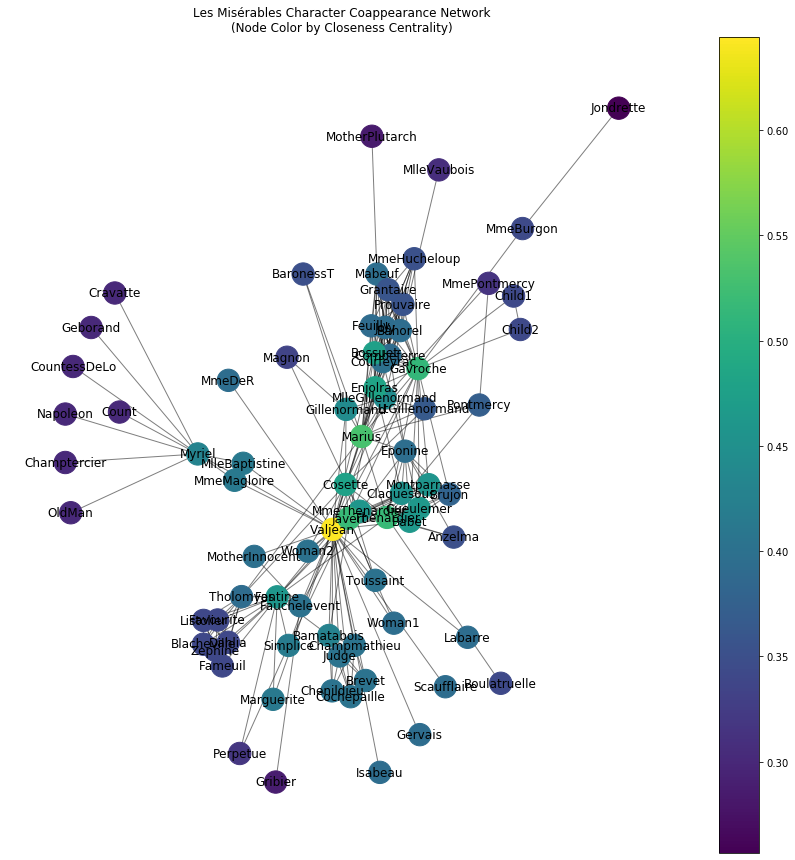

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.les_miserables_graph()

#closeness = nx.closeness_centrality(G)
adj_matrix = nx.adjacency_matrix(G)

closeness = nx.closeness_centrality(G)
# Plot the graph with nodes colored by closeness centrality
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=list(closeness.values()), cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
labels = nx.draw_networkx_labels(G, pos)

plt.colorbar(nodes)
plt.title("Les Misérables Character Coappearance Network\n(Node Color by Closeness Centrality)")
plt.axis('off')
plt.show()

## Giant component phenomenon

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def generate_erdos_renyi_graph(n, p):
    return nx.erdos_renyi_graph(n, p)

In [14]:
def largest_component_size(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc)

In [6]:
def simulate_giant_component(n, p_values):
    """
    Simulates the size of the largest component in Erdős-Rényi graphs for various p values
    :param n: Number of nodes in the graph
    :param p_values: List of edge probabilities
    :return: None
    """
    largest_component_sizes = []
    
    for p in p_values:
        G = generate_erdos_renyi_graph(n, p)
        largest_size = largest_component_size(G)
        largest_component_sizes.append(largest_size)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(p_values, largest_component_sizes, marker='o', label=f'Largest Component Size (n={n})')
    plt.axvline(x=1/n, color='r', linestyle='--', label='Critical Threshold p = 1/n')
    plt.xlabel('Edge Probability (p)')
    plt.ylabel('Size of Largest Connected Component')
    plt.title(f'Giant Component in Erdős-Rényi Graphs (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()

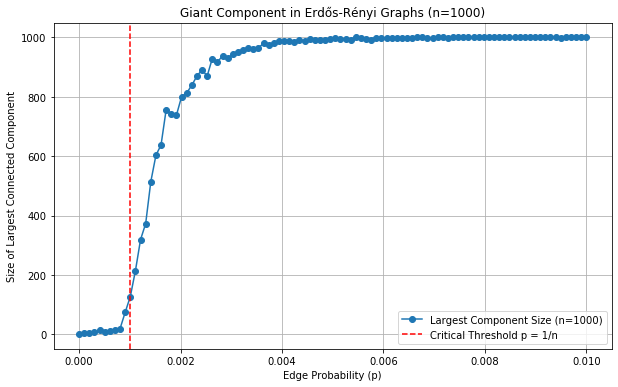

In [79]:
# Step 4: Investigate around the critical threshold p_c = 1/n
n = 1000  # Number of nodes
p_values = np.linspace(0, 0.01, 100)  # Range of probabilities
component
simulate_giant_component(n, p_values)

In [7]:
# Step 5: Investigate graph connectivity threshold
def is_graph_connected(G):
    """
    Checks if a graph is fully connected (i.e., there is a path between any pair of nodes)
    :param G: A NetworkX graph
    :return: True if the graph is connected, False otherwise
    """
    return nx.is_connected(G)

In [8]:
def simulate_connectivity_threshold(n, p_values):
    """
    Simulates the probability of full graph connectivity in Erdős-Rényi graphs
    :param n: Number of nodes in the graph
    :param p_values: List of edge probabilities
    :return: None
    """
    connectivity_probabilities = []
    
    for p in p_values:
        connected_count = 0
        trials = 100  # Number of trials to average over
        
        for _ in range(trials):
            G = generate_erdos_renyi_graph(n, p)
            if is_graph_connected(G):
                connected_count += 1
        
        connectivity_probabilities.append(connected_count / trials)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(p_values, connectivity_probabilities, marker='o', label=f'Graph Connectivity (n={n})')
    plt.axvline(x=np.log(n)/n, color='r', linestyle='--', label=r'Critical Threshold $p = \frac{\log n}{n}$')
    plt.xlabel('Edge Probability (p)')
    plt.ylabel('Fraction of Connected Graphs')
    plt.title(f'Graph Connectivity in Erdős-Rényi Graphs (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()

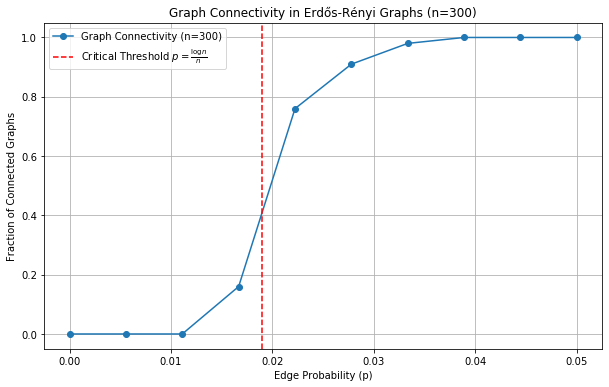

In [14]:
# Step 6: Investigate around the critical threshold p_conn = log(n) / n
n = 300  # Number of nodes
p_values = np.linspace(0, 0.05, 10)  # Range of probabilities for connectivity simulation
simulate_connectivity_threshold(n, p_values)